In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display


import numpy as np
import scipy as sp
import pandas as pd
import numpy.random as rand
import numpy.linalg as la
import numpy.ma as ma
import scipy.optimize as opt
import scipy.stats as stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import time

sns.set(context='talk', font_scale=1.0, color_codes=True, palette='deep', style='ticks', 
        rc={'mathtext.fontset': 'cm', 'xtick.direction': 'in','ytick.direction': 'in',
            'axes.linewidth': 1.5, 'figure.dpi':100, 'text.usetex':False})

,Flag Antibody,GFP - Area
0,187.686859,5196.793457
1,355.473175,9603.830078
2,41.772331,4211.423340
3,106.623306,586.752930
4,251.056992,17206.781250
...,...,...
22005,819.340881,26279.457030
22006,217.897446,5552.517090
22007,172.323105,3148.043213
22008,2958.141602,99144.625000


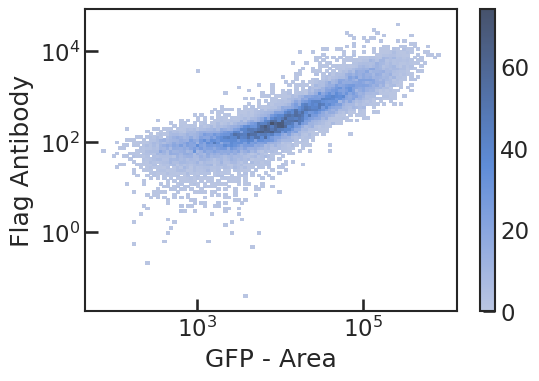

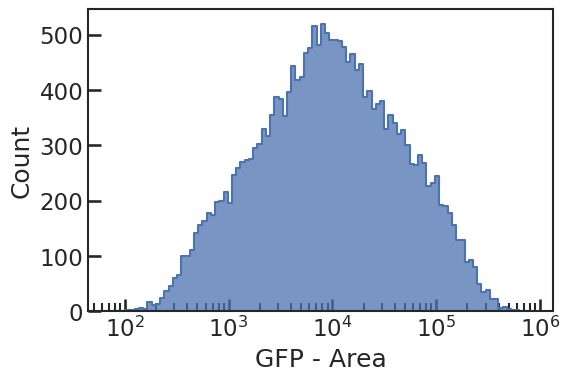

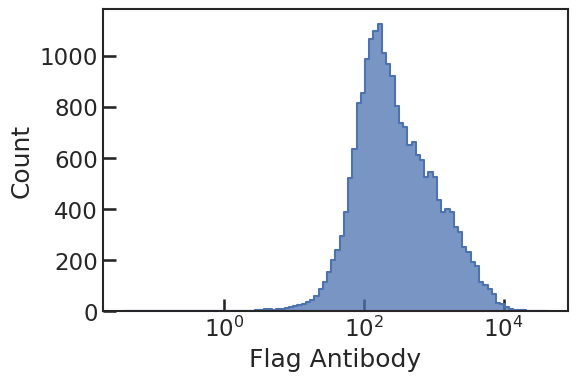

In [2]:
nbins_anti = 100
nbins_gfp = 100

df = pd.read_csv("../data/Kinase Noise.csv")
df = df[(df[df.columns] >= 0).all(axis=1)]

display(df)


sns.histplot(df, x='GFP - Area', y='Flag Antibody', bins=(nbins_gfp, nbins_anti), 
             log_scale=(True, True), cbar=True)

plt.show()



sns.histplot(df, x='GFP - Area', bins=nbins_gfp, log_scale=True, cbar=True, element='step')

plt.show()

sns.histplot(df, x='Flag Antibody', bins=nbins_anti, log_scale=True, cbar=True, element='step')

plt.show()

mu_anti: 2.4547138502497554
sigma2_anti: 0.31996553598717153
mu_GFP: 3.9648837918135134
sigma2_GFP: 0.4813946903873713
rho: 0.8710391592495841
Sigma2: 0.041263024532063104
A: 0.7101312640500785
B: -0.3608740886424431


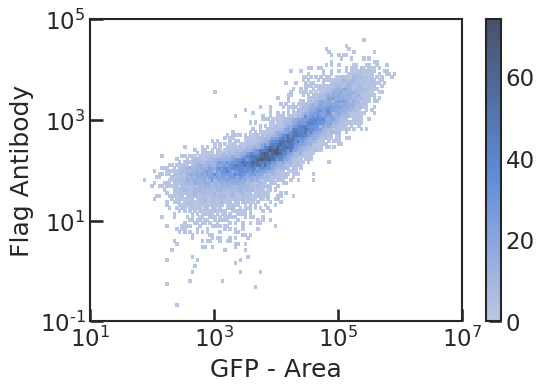

[[0.31996554 0.34185342]
 [0.34185342 0.48139469]]
[0.04942721 0.75193302]
[2.45471385 3.96488379]


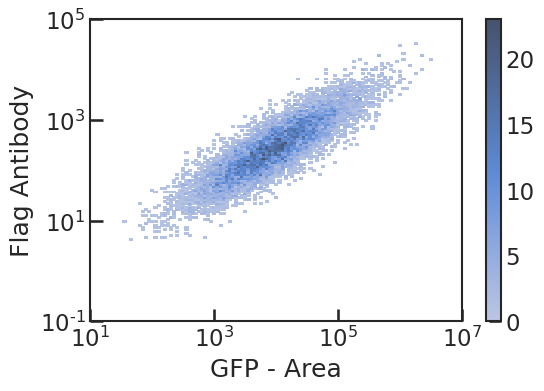

In [12]:
mu_anti = np.log10(df['Flag Antibody']).mean()
sigma2_anti = np.log10(df['Flag Antibody']).var()

print("mu_anti:", mu_anti)
print("sigma2_anti:", sigma2_anti)

mu_GFP = np.log10(df['GFP - Area']).mean()
sigma2_GFP = np.log10(df['GFP - Area']).var()

print("mu_GFP:", mu_GFP)
print("sigma2_GFP:", sigma2_GFP)

rho = sp.stats.pearsonr(np.log10(df['Flag Antibody']), np.log10(df['GFP - Area']))[0]
print("rho:", rho)

print("Sigma2:", sigma2_anti*(1-rho))
print("A:", rho*np.sqrt(sigma2_anti/sigma2_GFP))
print("B:", mu_anti - rho*np.sqrt(sigma2_anti/sigma2_GFP) * mu_GFP)

ax = sns.histplot(df, x='GFP - Area', y='Flag Antibody', bins=(nbins_gfp, nbins_anti), 
             log_scale=(True, True), cbar=True)

ax.set_xlim(1e1, 1e7)
ax.set_ylim(1e-1, 1e5)
plt.show()


cov = np.cov(np.log10(df.values.T))

print(cov)

print(la.eigvalsh(cov))


mu = np.mean(np.log10(df.values.T), axis=1)

print(mu)

samples = 10**rand.multivariate_normal(mu, cov, size=10000)

ax = sns.histplot(pd.DataFrame(samples, columns=['Flag Antibody', 'GFP - Area']), 
                  x='GFP - Area', y='Flag Antibody', bins=(nbins_gfp, nbins_anti), 
             log_scale=(True, True), cbar=True)

ax.set_xlim(1e1, 1e7)
ax.set_ylim(1e-1, 1e5)
plt.show()

,HA Antibody,GFP - Area
0,186.737915,390.879089
1,50.200890,127.545250
2,351.268463,929.290222
3,1105.468140,6288.958496
4,213.260712,138.191666
...,...,...
24639,631.033630,3914.144531
24640,278.428253,390.982666
24641,1854.564575,6020.913086
24642,48.587322,154.131790


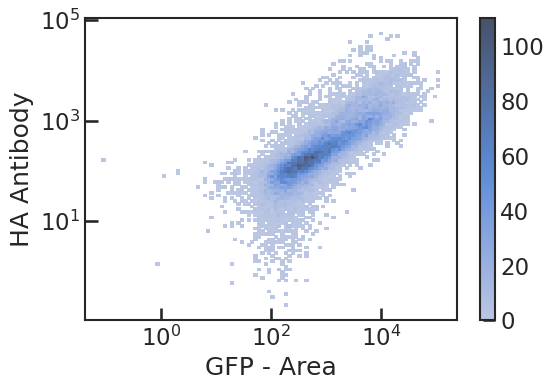

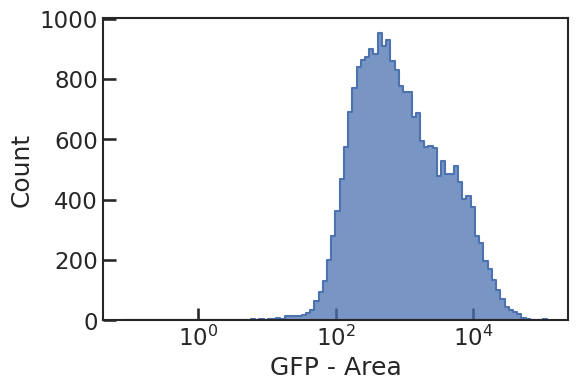

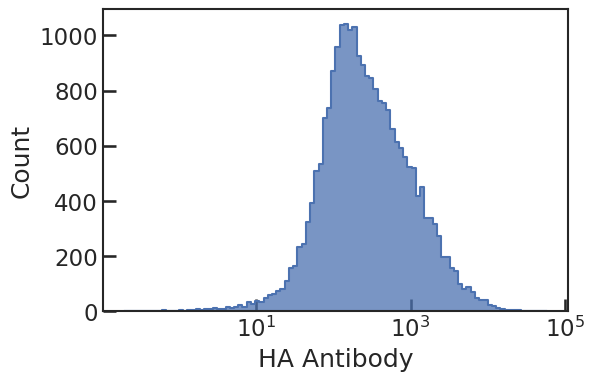

In [13]:
nbins_anti = 100
nbins_gfp = 100

df = pd.read_csv("../data/Phosphatase Noise.csv")
df = df[(df[df.columns] >= 0).all(axis=1)]

display(df)


sns.histplot(df, x='GFP - Area', y='HA Antibody', bins=(nbins_gfp, nbins_anti), 
             log_scale=(True, True), cbar=True)

plt.show()


sns.histplot(df, x='GFP - Area', bins=nbins_gfp, log_scale=True, cbar=True, element='step')

plt.show()

sns.histplot(df, x='HA Antibody', bins=nbins_anti, log_scale=True, cbar=True, element='step')

plt.show()

mu_anti: 2.431531292441701
sigma2_anti: 0.33277461896463356
mu_GFP: 2.952936493296508
sigma2_GFP: 0.4053970680592521
rho: 0.82536693240613
Sigma2: 0.05811345252717518
A: 0.7477938015354418
B: 0.2233436864267686


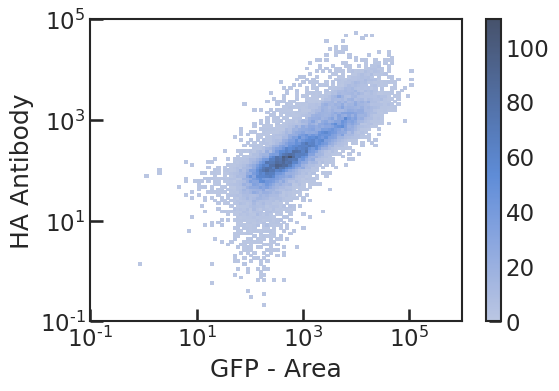

[[0.33277462 0.30315341]
 [0.30315341 0.40539707]]
[0.06376552 0.67440616]
[2.43153129 2.95293649]


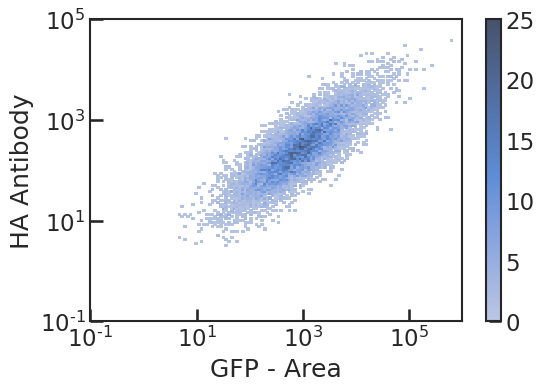

In [16]:
mu_anti = np.log10(df['HA Antibody']).mean()
sigma2_anti = np.log10(df['HA Antibody']).var()

print("mu_anti:", mu_anti)
print("sigma2_anti:", sigma2_anti)

mu_GFP = np.log10(df['GFP - Area']).mean()
sigma2_GFP = np.log10(df['GFP - Area']).var()

print("mu_GFP:", mu_GFP)
print("sigma2_GFP:", sigma2_GFP)

rho = sp.stats.pearsonr(np.log10(df['HA Antibody']), np.log10(df['GFP - Area']))[0]
print("rho:", rho)

print("Sigma2:", sigma2_anti*(1-rho))
print("A:", rho*np.sqrt(sigma2_anti/sigma2_GFP))
print("B:", mu_anti - rho*np.sqrt(sigma2_anti/sigma2_GFP) * mu_GFP)

ax = sns.histplot(df, x='GFP - Area', y='HA Antibody', bins=(nbins_gfp, nbins_anti), 
             log_scale=(True, True), cbar=True)

ax.set_xlim(1e-1, 1e6)
ax.set_ylim(1e-1, 1e5)
plt.show()


cov = np.cov(np.log10(df.values.T))

print(cov)

print(la.eigvalsh(cov))


mu = np.mean(np.log10(df.values.T), axis=1)

print(mu)

samples = 10**rand.multivariate_normal(mu, cov, size=10000)

ax = sns.histplot(pd.DataFrame(samples, columns=['HA Antibody', 'GFP - Area']), 
                  x='GFP - Area', y='HA Antibody', bins=(nbins_gfp, nbins_anti), 
             log_scale=(True, True), cbar=True)

ax.set_xlim(1e-1, 1e6)
ax.set_ylim(1e-1, 1e5)
plt.show()

,Myc Antibody,GFP - Area
0,350.844482,3913.260498
1,1327.086426,14438.492190
2,833.156799,9002.547852
3,415.282654,3438.784180
4,260.497681,3944.230713
...,...,...
21933,88.697136,369.316315
21934,174.043274,3317.098389
21935,217.648987,2090.604736
21936,1159.802124,10384.017580


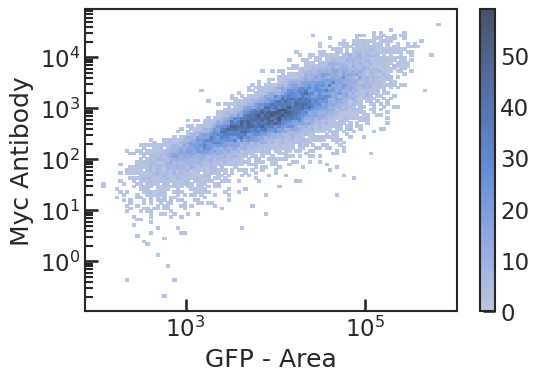

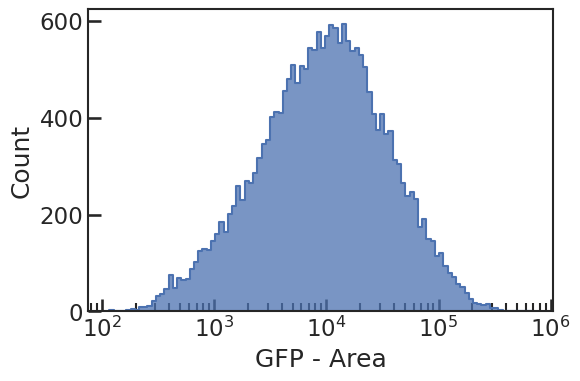

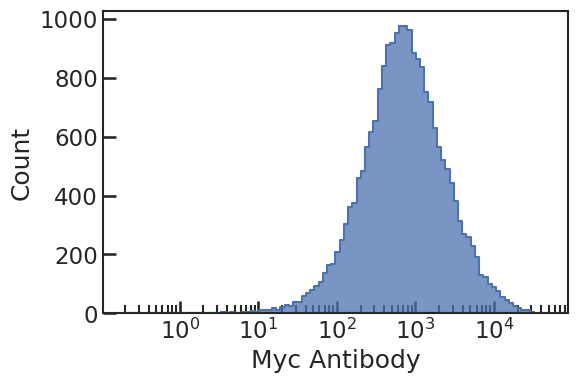

In [17]:
nbins_anti = 100
nbins_gfp = 100

df = pd.read_csv("../data/Substrate Noise.csv")
df = df[(df[df.columns] >= 0).all(axis=1)]

display(df)


sns.histplot(df, x='GFP - Area', y='Myc Antibody', bins=(nbins_gfp, nbins_anti), 
             log_scale=(True, True), cbar=True)

plt.show()


sns.histplot(df, x='GFP - Area', bins=nbins_gfp, log_scale=True, cbar=True, element='step')

plt.show()

sns.histplot(df, x='Myc Antibody', bins=nbins_anti, log_scale=True, cbar=True, element='step')

plt.show()

mu_anti: 2.847102235564242
sigma2_anti: 0.2804973270543793
mu_GFP: 3.9676502676120853
sigma2_GFP: 0.32357132907865677
rho: 0.8402949949535792
Sigma2: 0.0447968270327272
A: 0.7823680811525443
B: -0.2570606909918043


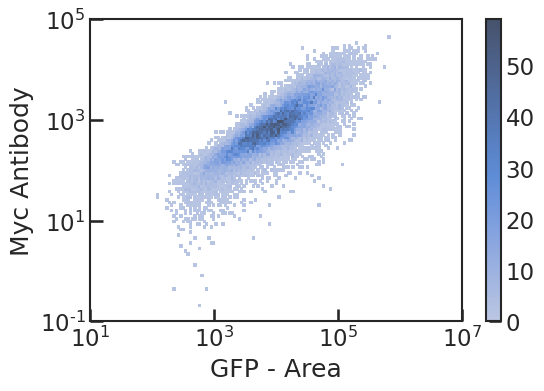

[[0.28049733 0.25315188]
 [0.25315188 0.32357133]]
[0.04796797 0.55610069]
[2.84710224 3.96765027]


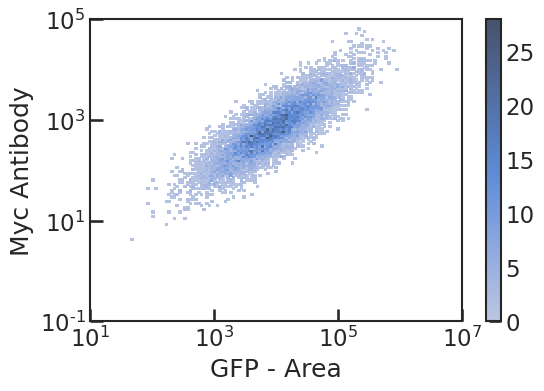

In [21]:
mu_anti = np.log10(df['Myc Antibody']).mean()
sigma2_anti = np.log10(df['Myc Antibody']).var()

print("mu_anti:", mu_anti)
print("sigma2_anti:", sigma2_anti)

mu_GFP = np.log10(df['GFP - Area']).mean()
sigma2_GFP = np.log10(df['GFP - Area']).var()

print("mu_GFP:", mu_GFP)
print("sigma2_GFP:", sigma2_GFP)

rho = sp.stats.pearsonr(np.log10(df['Myc Antibody']), np.log10(df['GFP - Area']))[0]
print("rho:", rho)

print("Sigma2:", sigma2_anti*(1-rho))
print("A:", rho*np.sqrt(sigma2_anti/sigma2_GFP))
print("B:", mu_anti - rho*np.sqrt(sigma2_anti/sigma2_GFP) * mu_GFP)

ax = sns.histplot(df, x='GFP - Area', y='Myc Antibody', bins=(nbins_gfp, nbins_anti), 
             log_scale=(True, True), cbar=True)

ax.set_xlim(1e1, 1e7)
ax.set_ylim(1e-1, 1e5)
plt.show()


cov = np.cov(np.log10(df.values.T))

print(cov)

print(la.eigvalsh(cov))


mu = np.mean(np.log10(df.values.T), axis=1)

print(mu)

samples = 10**rand.multivariate_normal(mu, cov, size=10000)

ax = sns.histplot(pd.DataFrame(samples, columns=['Myc Antibody', 'GFP - Area']), 
                  x='GFP - Area', y='Myc Antibody', bins=(nbins_gfp, nbins_anti), 
             log_scale=(True, True), cbar=True)

ax.set_xlim(1e1, 1e7)
ax.set_ylim(1e-1, 1e5)
plt.show()